

> Importações e Configurações Gerais



In [3]:
import sympy as sp
from sympy import *
import numpy as np
import matplotlib.pyplot as plt

# SPRINT 4 - DEV4 - 1ECB

Integrantes do Grupo:

      - Nome                       | RM
      - Ana Luiza Oliveira Dourado | 558793
      - Lucas Rodrigues Grecco     | 558261
      - Monique Ferreira dos Anjos | 558262
      - Felipe Wapf Fettback       | 557217
      - Ronaldo Veloso Filho       | 556445

### Introdução ao Case

Imaginem que sua equipe fundou uma empresa, em parceria com a John Deere©, com atuação no setor de robótica. Considere que o lucro anual L em reais (R$) dessa empresa do setor de tecnologia é estimado (projetado) pela função

                L(y) = 3y5  -  585y³  +  43740y  -  T,      com    - 10 = y = 10

                 onde y = 0 representa 1.o de janeiro do ano de 2024;      y = 1 é 1.o de janeiro de 2025,  y = - 1 é 1.o de janeiro de 2023, e assim por diante.

Para obter o valor de T:

Escolher apenas um único RM da equipe. Somar todos os algarismos do RM escolhido. Multiplicar a soma obtida por “1000” (mil).

In [4]:
def soma_rm(rm):
    return sum(int(i) for i in str(rm))
rm = int(input("Insira seu rm: "))
#z = calcular a soma dos digitos do rm e multiplicar por 3000
t = soma_rm(rm)*1000
print(f'O rm escolhido é {rm} e o valor de T é {t}')

Insira seu rm: 558261
O rm escolhido é 558261 e o valor de T é 27000


### Questão 1 - Determinar as coordenadas dos pontos críticos da função lucro

In [5]:
# y = variável da função
y = sp.Symbol('y')
# L = Lucro anual em reais
L = 3*y**5 - 585*y**3 + 43740*y - t
print(f'Função N(V): ')
L


Função N(V): 


3*y**5 - 585*y**3 + 43740*y - 27000

In [6]:
# Calcular a primeira derivada de L em relação a y
L_primeira_derivada = sp.diff(L, y)
print(f'Primeira Derivada de L em relação a y: ')
L_primeira_derivada

Primeira Derivada de L em relação a y: 


15*y**4 - 1755*y**2 + 43740

In [7]:
# Resolver L'(y) = 0 para encontrar os pontos críticos
pontos_criticos = sp.solve(L_primeira_derivada, y)
print(f'Pontos críticos são: {pontos_criticos}')



Pontos críticos são: [-9, -6, 6, 9]


In [8]:
# Calcular a segunda derivada para determinar se é máximo ou mínimo
L_segunda_derivada = sp.diff(L_primeira_derivada, y)
print('A segunda derivada de L em relação a y é: ')
L_segunda_derivada

A segunda derivada de L em relação a y é: 


60*y**3 - 3510*y

In [9]:
# Verificar os pontos críticos e o valor da função L nesses pontos
for ponto in pontos_criticos:
    if ponto <= max(pontos_criticos):
        L_valor = L.subs(y, ponto)
        concavidade = L_segunda_derivada.subs(y, ponto)

        if concavidade > 0:
            natureza = 'mínimo'
        elif concavidade < 0:
            natureza = 'máximo'
        else:
            natureza = 'indefinido (possível ponto de inflexão)'
        print(f'Coordenada: ({ponto}, {L_valor})')
        print(f'Para y = {ponto}, L = {L_valor}, é um ponto de {natureza} local\n')

Coordenada: (-9, -171342)
Para y = -9, L = -171342, é um ponto de máximo local

Coordenada: (-6, -186408)
Para y = -6, L = -186408, é um ponto de mínimo local

Coordenada: (6, 132408)
Para y = 6, L = 132408, é um ponto de máximo local

Coordenada: (9, 117342)
Para y = 9, L = 117342, é um ponto de mínimo local



### Questão 02 - Classificar os pontos críticos obtidos na questão anterior  utilizando o critério da segunda derivada.

In [34]:
# Verificar os pontos críticos e o valor da função L nesses pontos
print('Resposta - Questão 02')
for ponto in pontos_criticos:
    if ponto <= max(pontos_criticos):
        L_valor = L.subs(y, ponto)
        concavidade = L_segunda_derivada.subs(y, ponto)

        if concavidade > 0:
            natureza = 'mínimo'
        elif concavidade < 0:
            natureza = 'máximo'
        else:
            natureza = 'indefinido (possível ponto de inflexão)'
        print(f'Coordenada: ({ponto}, {L_valor})')
        print(f'Para y = {ponto}, L = {L_valor}, é um ponto de {natureza} local\n')

Resposta - Questão 02
Coordenada: (-9, -171342)
Para y = -9, L = -171342, é um ponto de máximo local

Coordenada: (-6, -186408)
Para y = -6, L = -186408, é um ponto de mínimo local

Coordenada: (6, 132408)
Para y = 6, L = 132408, é um ponto de máximo local

Coordenada: (9, 117342)
Para y = 9, L = 117342, é um ponto de mínimo local



### Questão 03 - Determinar os intervalos nos quais o lucro é crescente e os intervalos nos quais o lucro é decrescente, complementando com a representação gráfica da função lucro.

In [33]:
# Filtrar os pontos críticos que estão no intervalo -10 < y <= 10
pontos_criticos_validos = [p for p in pontos_criticos if -10 <= p <= 10]
pontos_criticos_validos = sorted(pontos_criticos_validos)

# Adicionar os limites do intervalo [-10, 10]
pontos_criticos_validos = [-10] + pontos_criticos_validos + [10]

# Verificar o sinal da derivada nos intervalos definidos pelos pontos críticos
intervalos = []
for i in range(len(pontos_criticos_validos) - 1):
    start = pontos_criticos_validos[i]
    end = pontos_criticos_validos[i + 1]
    mid_point = (start + end) / 2

    # Avaliar o sinal da derivada no ponto médio do intervalo
    derivative_at_mid = L_primeira_derivada.subs(y, mid_point)

    if derivative_at_mid > 0:
        intervalos.append((start, end, "tem seu crescimento"))
    elif derivative_at_mid < 0:
        intervalos.append((start, end, "tem seu decrescimento"))

# Imprimir os intervalos de crescimento e decrescimento
print('Resposta - Questão 03')
for intervalo in intervalos:
    print(f"\n- A função {intervalo[2]} no intervalo ]{intervalo[0]}, {intervalo[1]}[ \n")

Resposta - Questão 03

- A função tem seu crescimento no intervalo ]-10, -9[ 


- A função tem seu decrescimento no intervalo ]-9, -6[ 


- A função tem seu crescimento no intervalo ]-6, 6[ 


- A função tem seu decrescimento no intervalo ]6, 9[ 


- A função tem seu crescimento no intervalo ]9, 10[ 



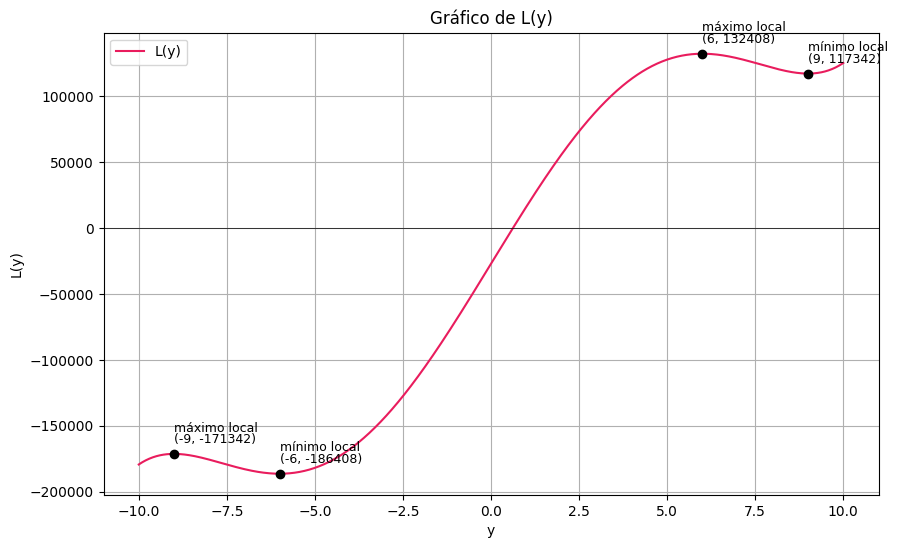

In [12]:
# Converter a derivada para uma função lambda que pode ser usada com NumPy
L_lambda = sp.lambdify(y, L, 'numpy')

# Definir o tamanho da figura (aumentando o gráfico)
plt.figure(figsize=(10, 6))  # Aumentar o tamanho para 10x6 polegadas

# Criar um intervalo de valores de V para plotar o gráfico
y_intervalo_valores = np.linspace(-10, 10, 1000)

# Calcular os valores da derivada para esses pontos
L_valores = L_lambda(y_intervalo_valores)

# Plotar o gráfico da primeira derivada
plt.plot(y_intervalo_valores, L_valores, label="L(y)", color='#e91c5d')
plt.axhline(0, color='black',linewidth=0.5)  # linha y = 0 para referência
plt.title("Gráfico de L(y)")
plt.xlabel('y')
plt.ylabel("L(y)")
plt.grid(True)

# Imprimir os pontos criticos no gráfico com as coordenadas e classificação
for ponto in pontos_criticos:
    if ponto <= max(pontos_criticos):
        L_valor = L.subs(y, ponto)
        plt.plot(ponto, L_valor, 'o', color='black')
        plt.text(ponto, L_valor+8000, f'({ponto}, {L_valor})', fontsize=9)
        concavidade = L_segunda_derivada.subs(y, ponto)

        if concavidade > 0:
            natureza = 'mínimo'
        elif concavidade < 0:
            natureza = 'máximo'
        else:
            natureza = 'indefinido (possível ponto de inflexão)'
        plt.text(ponto, L_valor+17000, f'{natureza} local', fontsize=9)

plt.legend()
plt.show()

### Questão 04 - Contextualize os intervalos obtidos na Questão 3

In [32]:
# Função para calcular o ano, através da variável y
def descobrir_ano(y):
  if y == 0 :
    ano = 2024
    return ano
  elif y > 0 :
    ano = 2024 + y
    return ano
  elif y < 0 :
    ano = 2024 + y
    return ano

def calcular_valor(numero):
    L_valor = L.subs(y, numero)
    return L_valor

def definir_tipo(n1, n2):
  n1 = calcular_valor(n1)
  n2 = calcular_valor(n2)
  if (n2) - (n1) > 0 :
    return f'Durante o intervalo, é obtido um crescimento total de R${(n2)-(n1)}'
  elif (n2) - (n1) < 0 :
    return f'Durante o intervalo, é obtido um prejuízo de R${(n2) - (n1)}'
  elif (n2) - (n1) == 0 :
    return f'Durante o intervalo, não ocorre mudanças'
  else :
    return f'Erro'


# Filtrar os pontos críticos que estão no intervalo -10 < y <= 10
pontos_criticos_validos = [p for p in pontos_criticos if -10 <= p <= 10]
pontos_criticos_validos = sorted(pontos_criticos_validos)

# Adicionar os limites do intervalo [-10, 10]
pontos_criticos_validos = [-10] + pontos_criticos_validos + [10]

# Verificar o sinal da derivada nos intervalos definidos pelos pontos críticos
intervalos = []
for i in range(len(pontos_criticos_validos) - 1):
    start = pontos_criticos_validos[i]
    end = pontos_criticos_validos[i + 1]
    mid_point = (start + end) / 2

    # Avaliar o sinal da derivada no ponto médio do intervalo
    derivative_at_mid = L_primeira_derivada.subs(y, mid_point)

    if derivative_at_mid > 0:
        intervalos.append((start, end, "tem seu crescimento"))
    elif derivative_at_mid < 0:
        intervalos.append((start, end, "tem seu decrescimento"))

# Imprimir os intervalos de crescimento e decrescimento
print('Resposta - Questão 04')
for intervalo in intervalos:
    n1 = int(intervalo[0])
    n2 = int(intervalo[1])
    print(f"\n- O lucro (R$) estimado para a empresa {intervalo[2]} local entre {descobrir_ano(n1)} a {descobrir_ano(n2)}")
    print(f'  de R${calcular_valor(n1)} a R${calcular_valor(n2)}')
    print(f'  {definir_tipo(n1,n2)}\n')


Resposta a Questão 04

- O lucro (R$) estimado para a empresa tem seu crescimento local entre 2014 a 2015
  de R$-179400 a R$-171342
  Durante o intervalo, é obtido um crescimento total de R$8058


- O lucro (R$) estimado para a empresa tem seu decrescimento local entre 2015 a 2018
  de R$-171342 a R$-186408
  Durante o intervalo, é obtido um prejuízo de R$-15066


- O lucro (R$) estimado para a empresa tem seu crescimento local entre 2018 a 2030
  de R$-186408 a R$132408
  Durante o intervalo, é obtido um crescimento total de R$318816


- O lucro (R$) estimado para a empresa tem seu decrescimento local entre 2030 a 2033
  de R$132408 a R$117342
  Durante o intervalo, é obtido um prejuízo de R$-15066


- O lucro (R$) estimado para a empresa tem seu crescimento local entre 2033 a 2034
  de R$117342 a R$125400
  Durante o intervalo, é obtido um crescimento total de R$8058

